In [7]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json
import pandas as pd

file_dir = "/data03/sunyi/time_constrained_cot/outputs/1_10"

o1_like_models = [
    "Qwen/QwQ-32B-Preview", 
    "NovaSky-AI/Sky-T1-32B-Preview", 
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
    # "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
]

no_o1_models = [
    "Qwen/Qwen2.5-32B-Instruct", 
    "Qwen/Qwen2.5-14B-Instruct", 
    "Qwen/Qwen2.5-7B-Instruct", 
    "Qwen/Qwen2.5-3B-Instruct", 
    "Qwen/Qwen2.5-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-7B-Instruct",
    
    "mistralai/Mistral-Small-Instruct-2409",
    "mistralai/Mistral-Nemo-Instruct-2407",
    "mistralai/Ministral-8B-Instruct-2410",
    "mistralai/Mathstral-7B-v0.1",
    
    "google/gemma-2-27b-it",
    "google/gemma-2-9b-it",
    "google/gemma-2-2b-it",
    
    "microsoft/phi-4",
    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
    "microsoft/Phi-3.5-mini-instruct",
]

model_list = o1_like_models + no_o1_models

DEEPSEEK_R1_DISTILL_PROMP_LIST = [ "-sbs", "-sbs-hard"]

PROMP_LIST = [ "-aav", "-c2f", "-sbs", "-direct", "-quick",  "-sbs-hard"]


In [8]:
MODEL_SERIES_MAP = {
    "NovaSky-AI/Sky-T1-32B-Preview": "qwen",
    "Qwen/QwQ-32B-Preview": "qwen",
    "Qwen/Qwen2.5-32B-Instruct": "qwen",
    "Qwen/Qwen2.5-14B-Instruct": "qwen",
    "Qwen/Qwen2.5-7B-Instruct": "qwen",
    "Qwen/Qwen2.5-3B-Instruct": "qwen",
    "Qwen/Qwen2.5-1.5B-Instruct": "qwen",
    "Qwen/Qwen2.5-Math-1.5B-Instruct": "qwen-math",
    "Qwen/Qwen2.5-Math-7B-Instruct": "qwen-math",
    
    "google/gemma-2-2b-it": "gemma",
    "google/gemma-2-9b-it": "gemma",
    "google/gemma-2-27b-it": "gemma",
    
    "mistralai/Mathstral-7B-v0.1": "mistral",
    "mistralai/Ministral-8B-Instruct-2410": "mistral",
    "mistralai/Mistral-Nemo-Instruct-2407": "mistral",
    "mistralai/Mistral-Small-Instruct-2409": "mistral",
    
    "microsoft/phi-4": "phi4",
    "microsoft/Phi-3-medium-128k-instruct": "phi3medium",
    "microsoft/Phi-3-small-128k-instruct": "phi3small",
    "microsoft/Phi-3.5-mini-instruct": "phi3mini",
    "microsoft/Phi-3-mini-128k-instruct": "phi3mini",
    
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B": "deepseek-r1-distill",
}


MODEL_SERIES_PROMPT_TYPE_MAP = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST],
    "qwen-math": ["qwen-math" + prompt for prompt in PROMP_LIST],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST],
    "deepseek-r1-distill": ["deepseek-r1-distill"+prompt for prompt in DEEPSEEK_R1_DISTILL_PROMP_LIST],
}

In [9]:

def gen_budget_list(budget, data_name, model):
    if budget == -1:
        return [-1]
    elif budget == 1:
        o1_like_models = [
            "Qwen/QwQ-32B-Preview", 
            "Skywork/Skywork-o1-Open-Llama-3.1-8B", 
            "PowerInfer/SmallThinker-3B-Preview",
            "NovaSky-AI/Sky-T1-32B-Preview", 
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
            "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
        ]
        if model in o1_like_models: # maybe should extend to longer sequence
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 1201, 50):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 2401, 50):
                    budget_list.append(i)
        else:    
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 601, 25):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 1201, 50):
                    budget_list.append(i)
        return budget_list

In [10]:
dataset = "gsm8k"
something = "_-1_seed0_t0.0_s0_e-1"

In [11]:
model_acc_dicts = {}
prompt_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

display(model_acc_dicts)

{'Qwen/QwQ-32B-Preview': {'qwen-aav': [40.1,
   45.1,
   50.3,
   53.6,
   59.1,
   65.7,
   69.4,
   74.2,
   78.4,
   81.7,
   85.9,
   87.3,
   89.1,
   90.7,
   91.8,
   92.2,
   93.2,
   93.7,
   94.1,
   94.5,
   94.5,
   94.8,
   95.2,
   95.4,
   95.6,
   95.8,
   95.8,
   96.0,
   95.7,
   95.8,
   95.5,
   95.5,
   95.5,
   95.7,
   95.5,
   95.8],
  'qwen-c2f': [37.9,
   44.6,
   51.3,
   58.7,
   65.7,
   71.5,
   77.0,
   80.6,
   84.2,
   87.6,
   89.9,
   90.4,
   91.1,
   92.6,
   92.8,
   92.9,
   93.8,
   93.6,
   94.2,
   94.8,
   94.5,
   95.1,
   95.1,
   95.1,
   94.9,
   95.2,
   95.4,
   95.5,
   95.5,
   95.5,
   95.4,
   95.7,
   95.7,
   95.5,
   95.5,
   95.6],
  'qwen-sbs': [37.7,
   40.9,
   42.2,
   45.4,
   48.3,
   54.1,
   58.9,
   66.6,
   70.4,
   75.1,
   80.3,
   82.8,
   85.0,
   87.4,
   88.9,
   90.1,
   91.2,
   92.1,
   92.9,
   93.5,
   94.2,
   94.4,
   94.8,
   94.8,
   94.8,
   95.6,
   95.5,
   95.2,
   95.2,
   95.5,
   95.7,
   95.4,
  

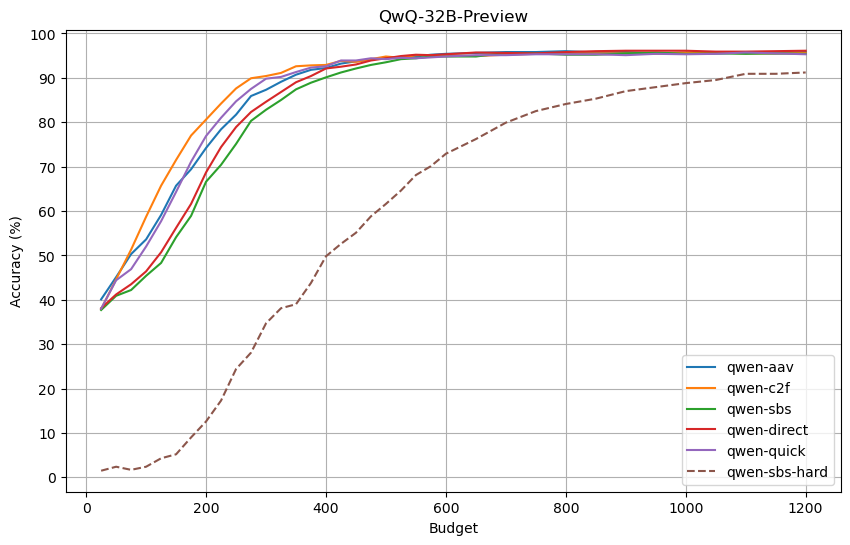

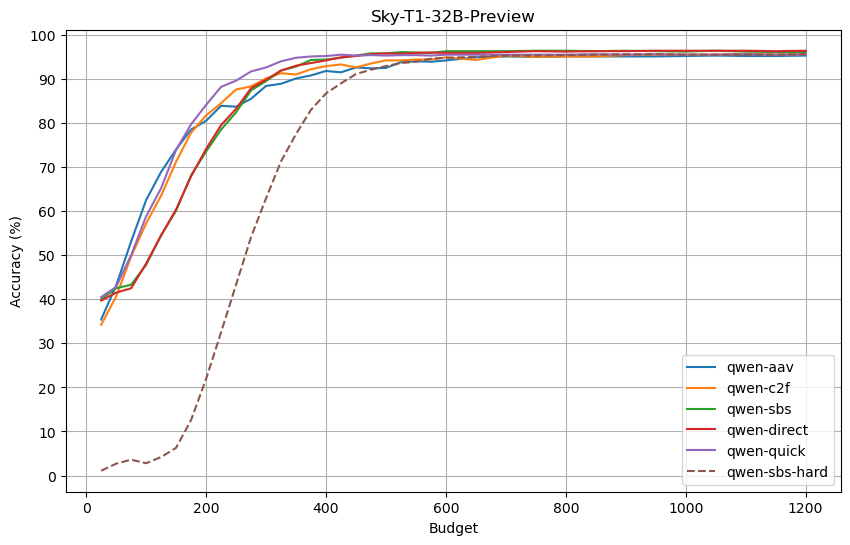

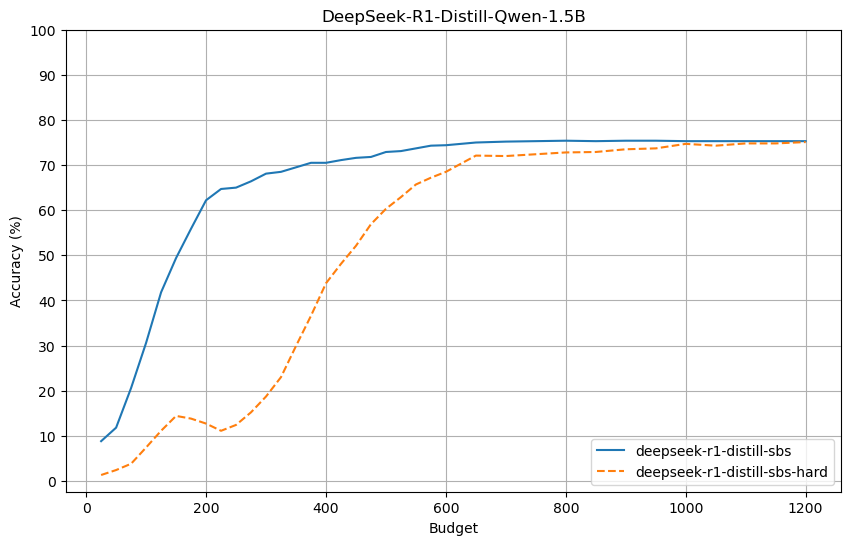

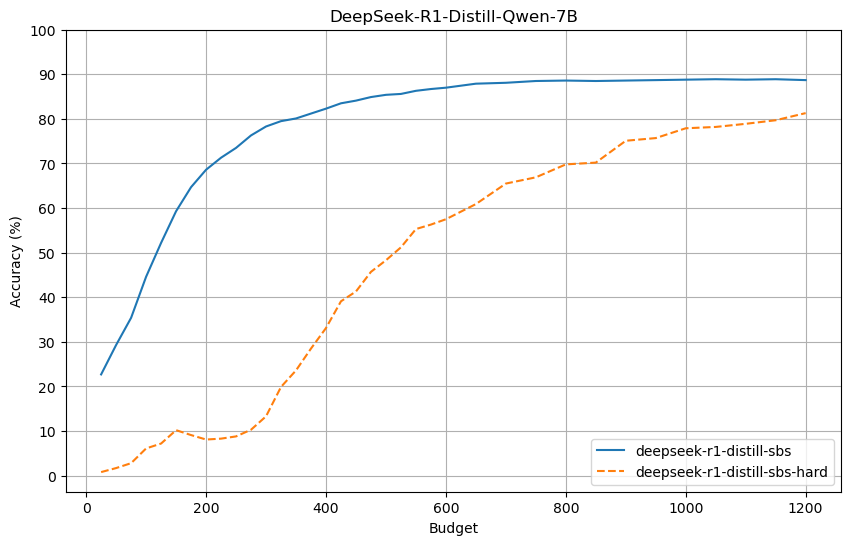

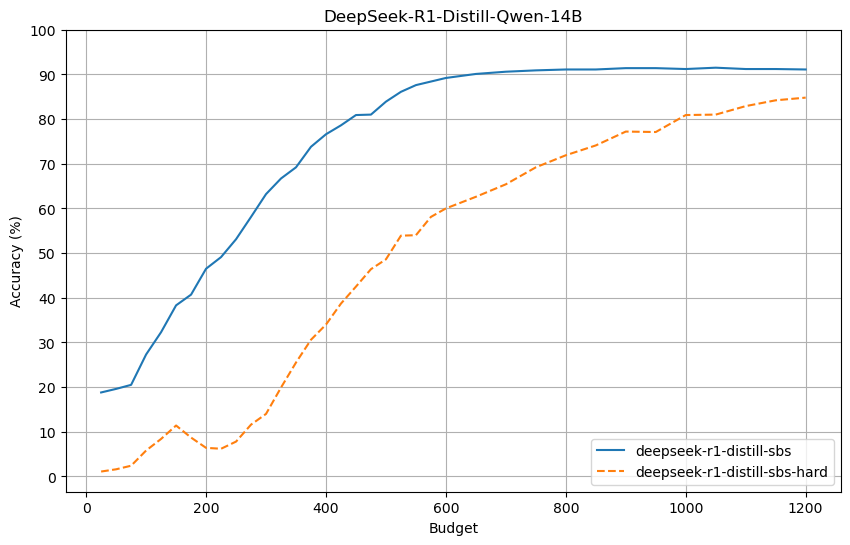

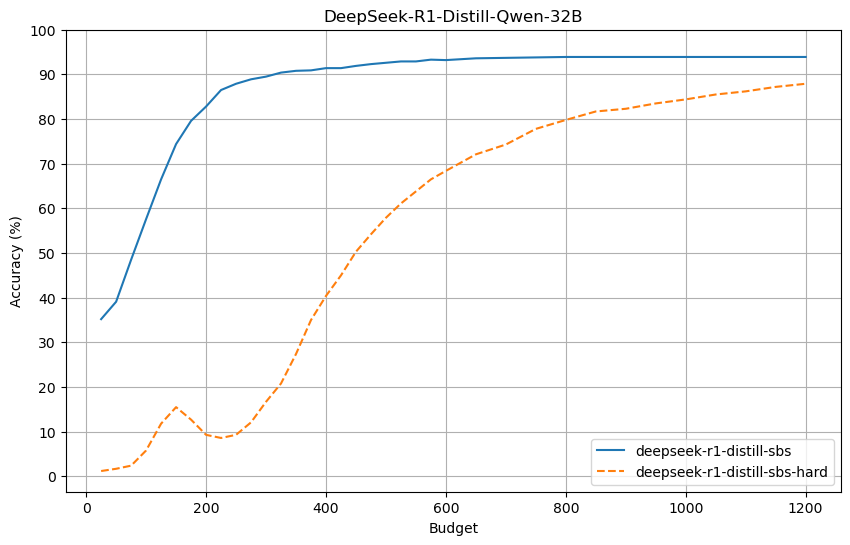

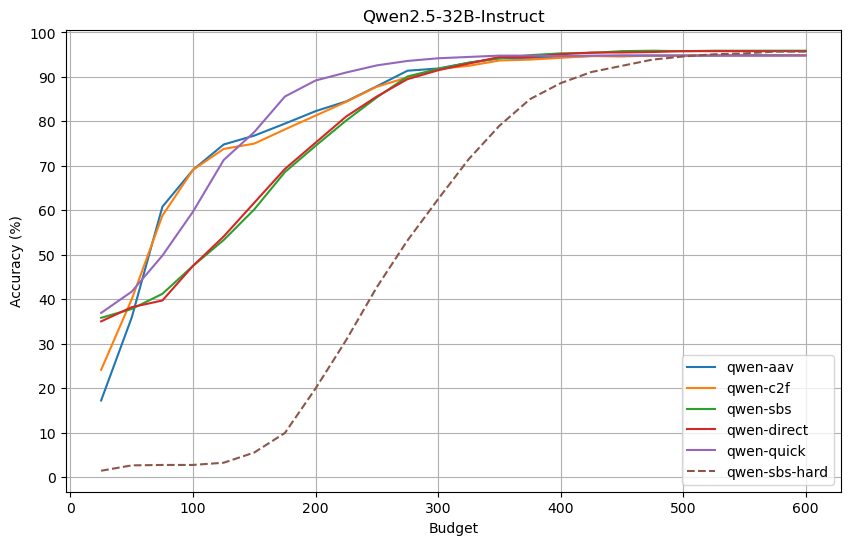

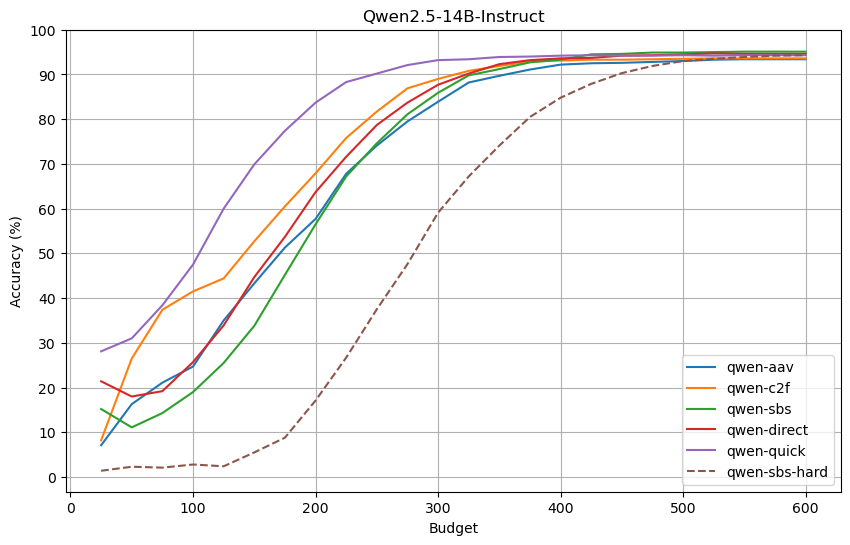

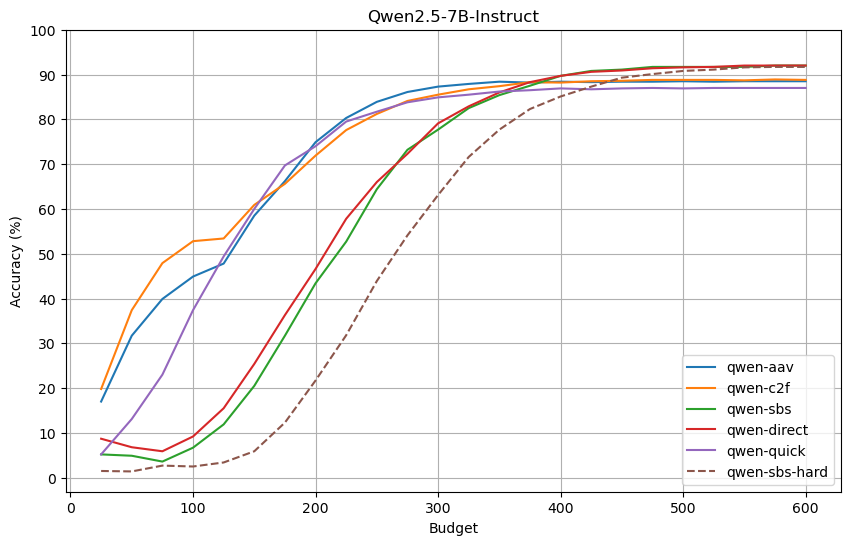

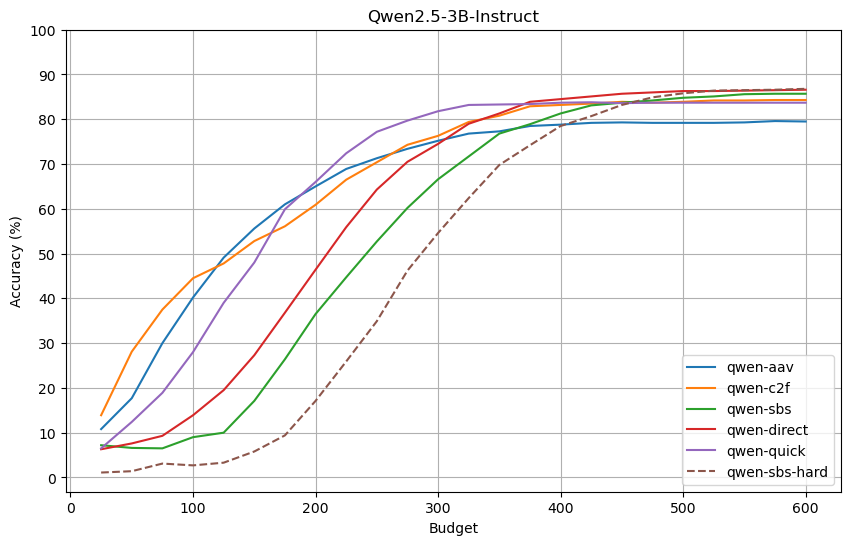

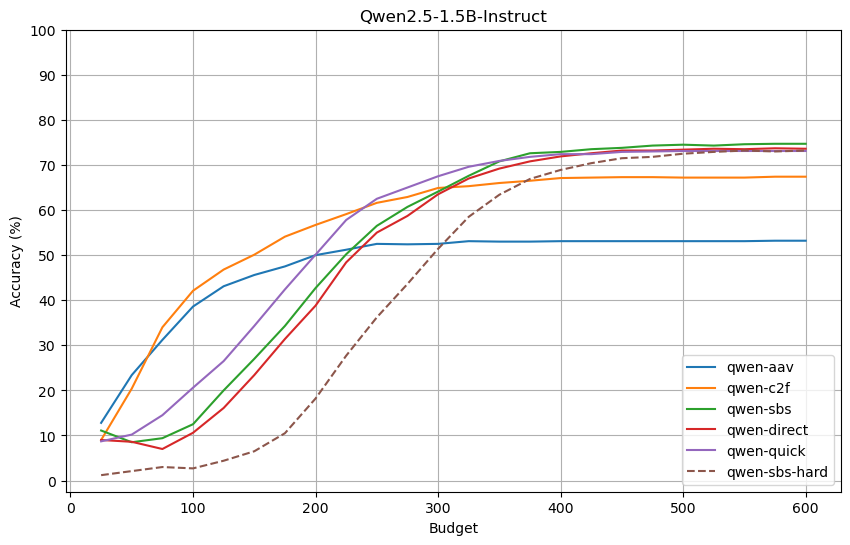

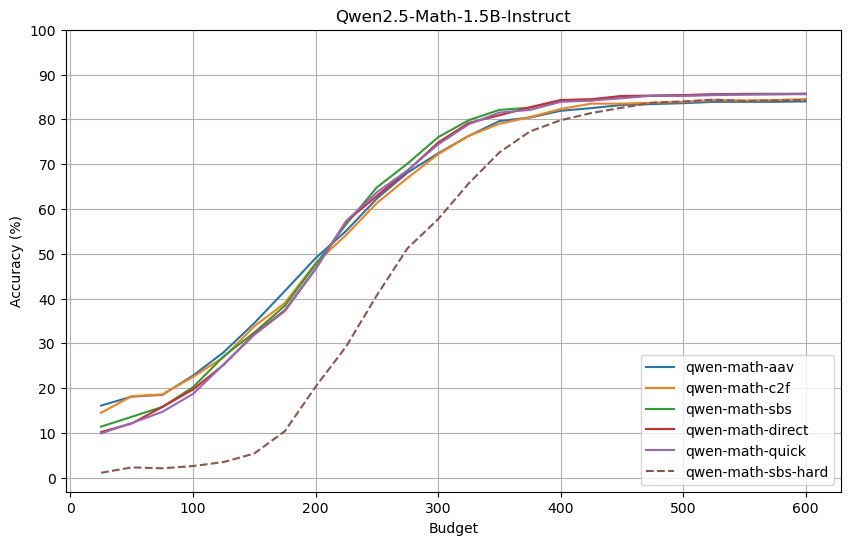

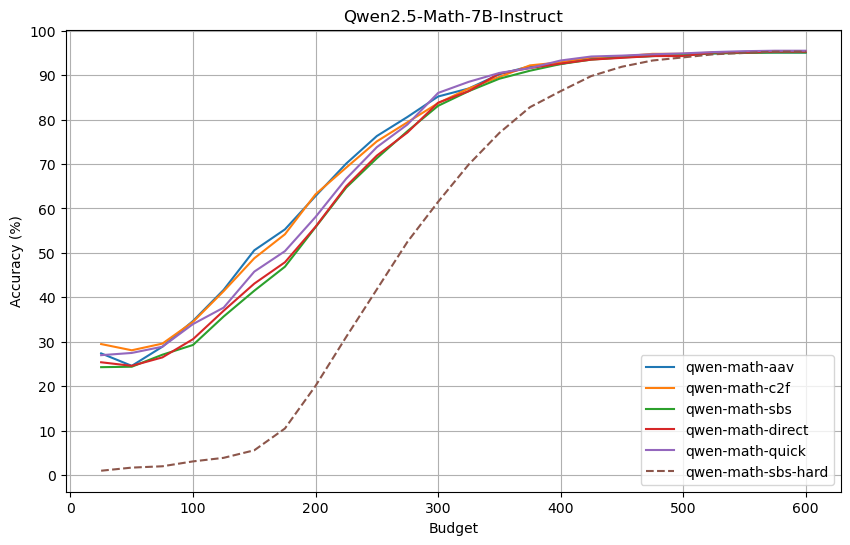

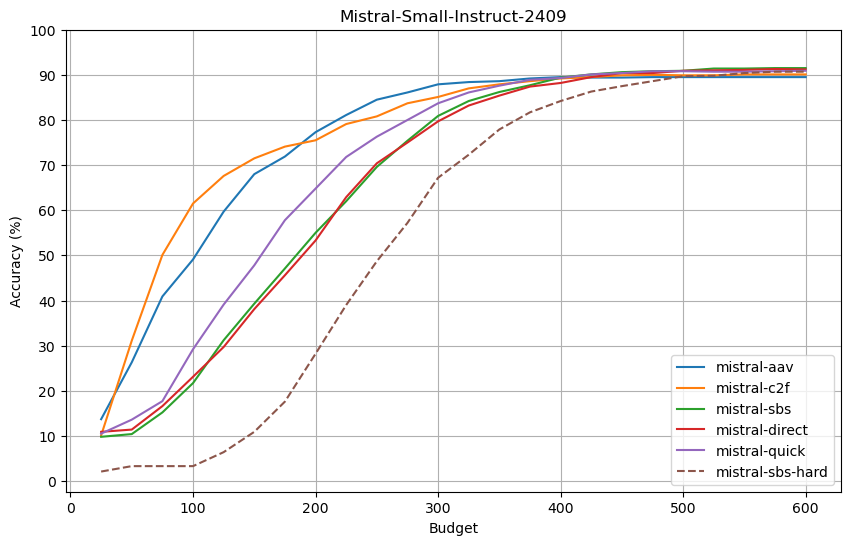

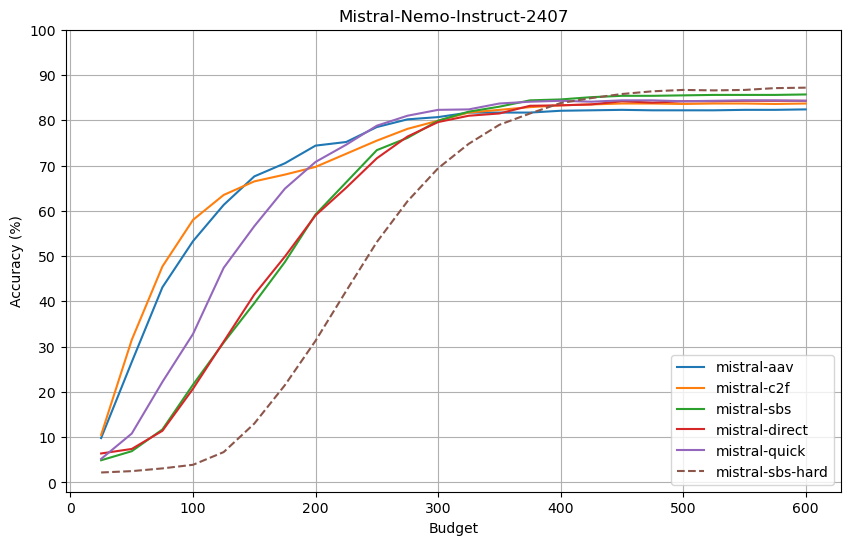

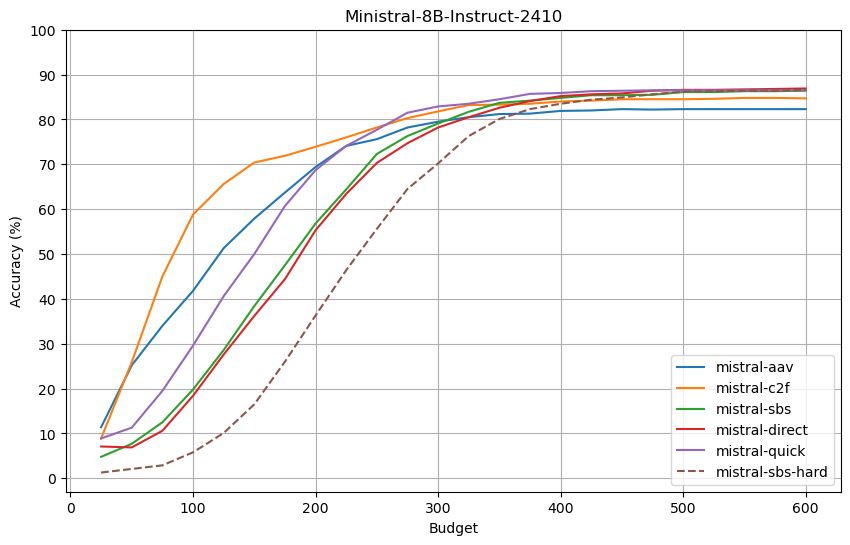

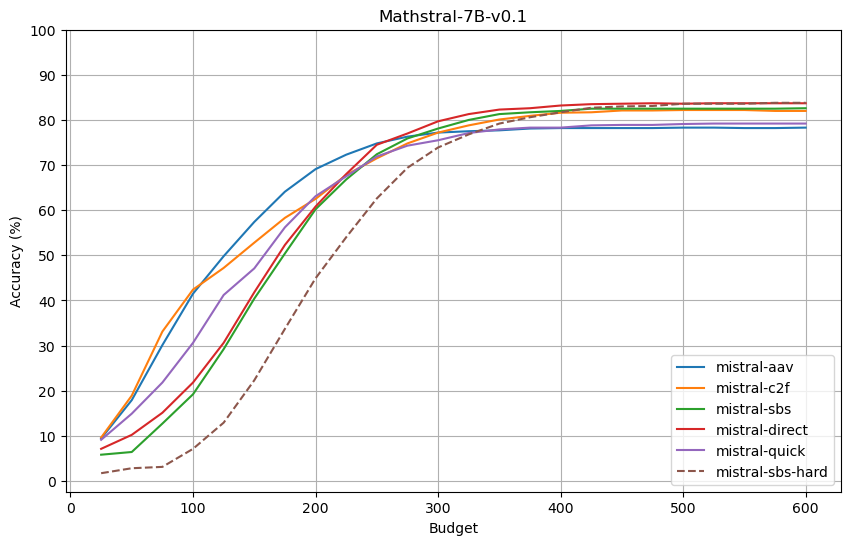

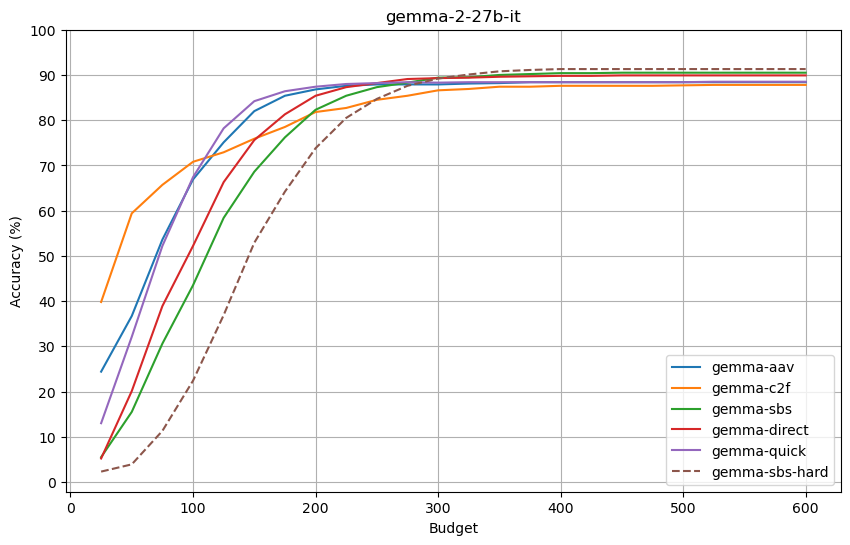

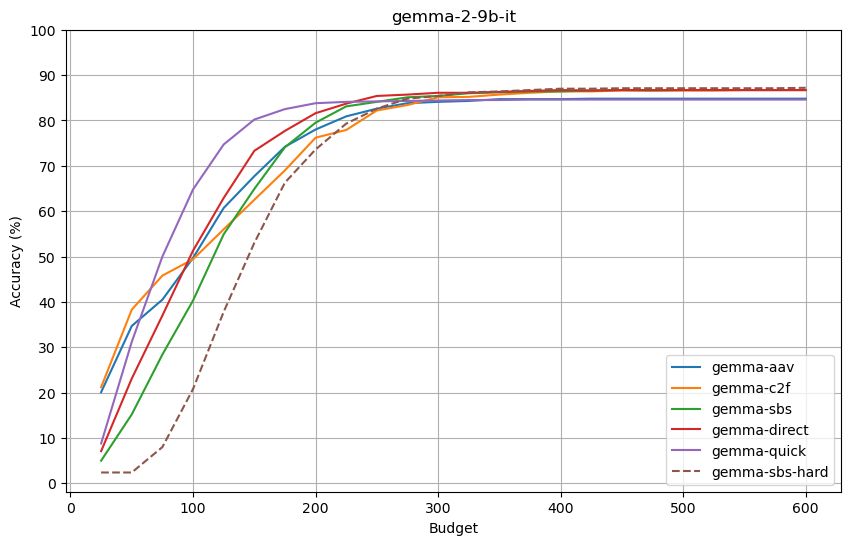

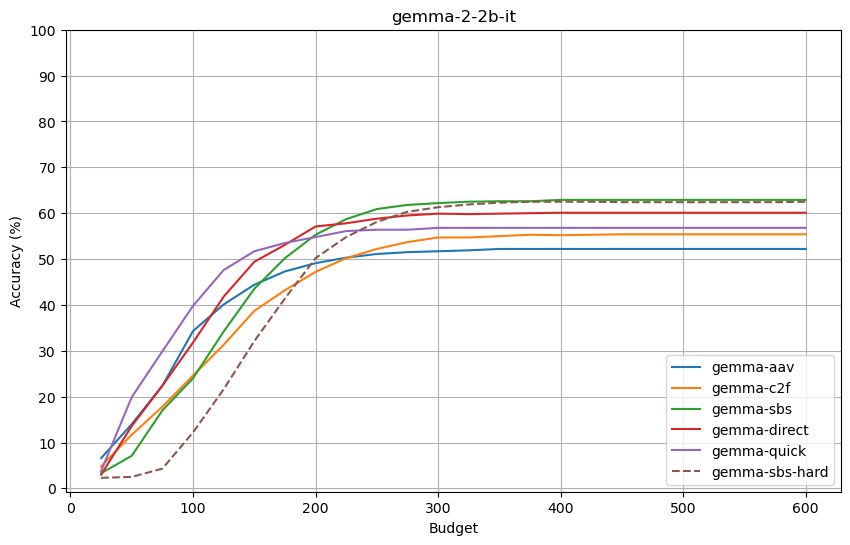

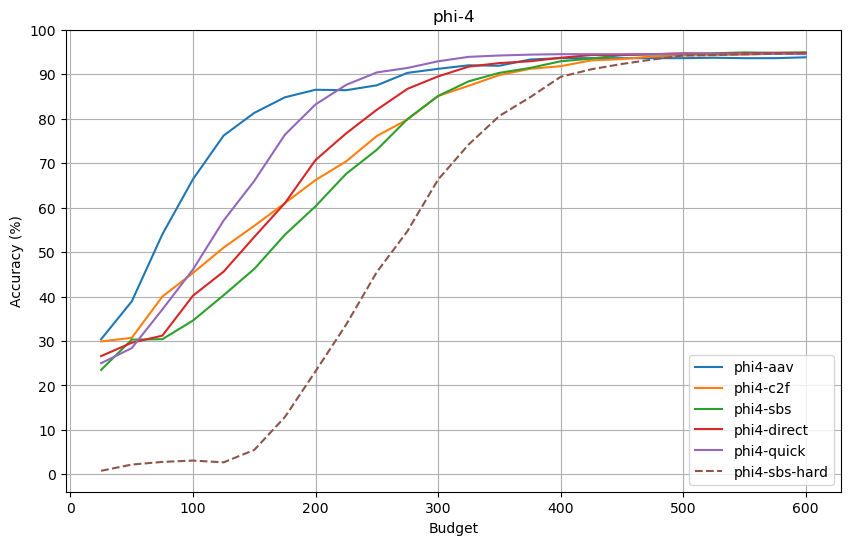

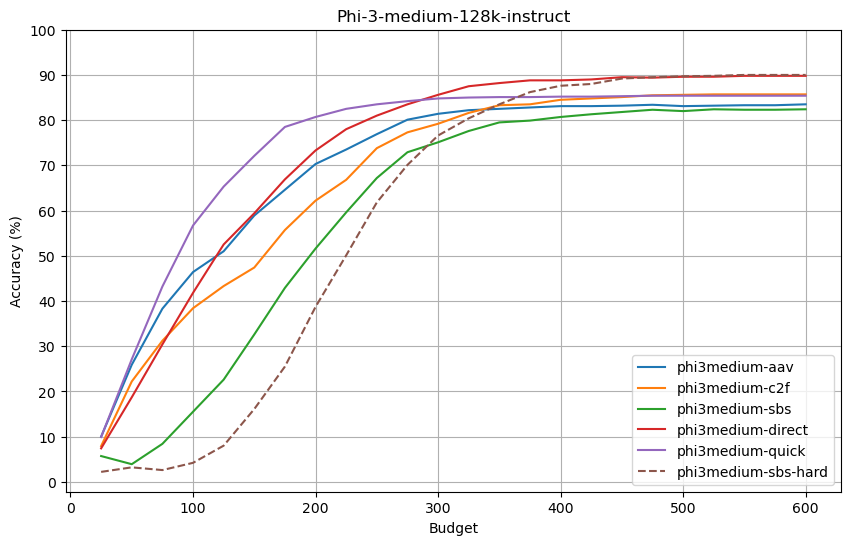

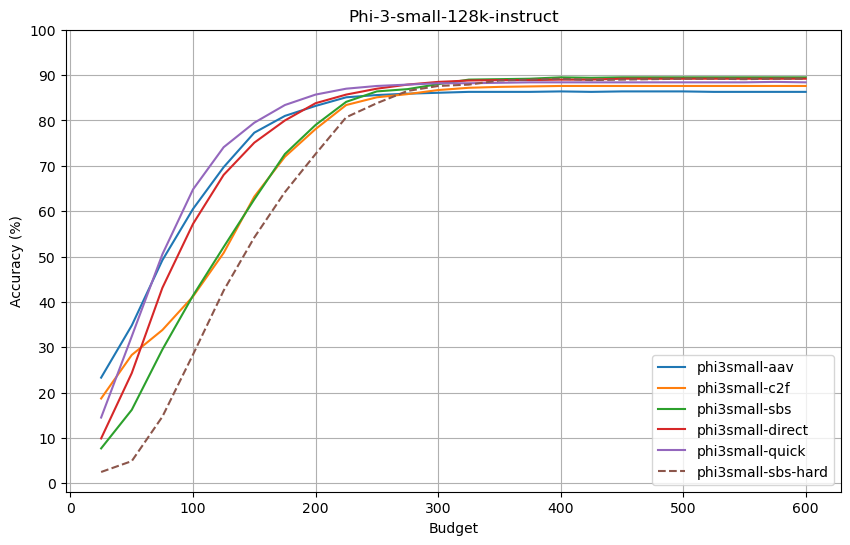

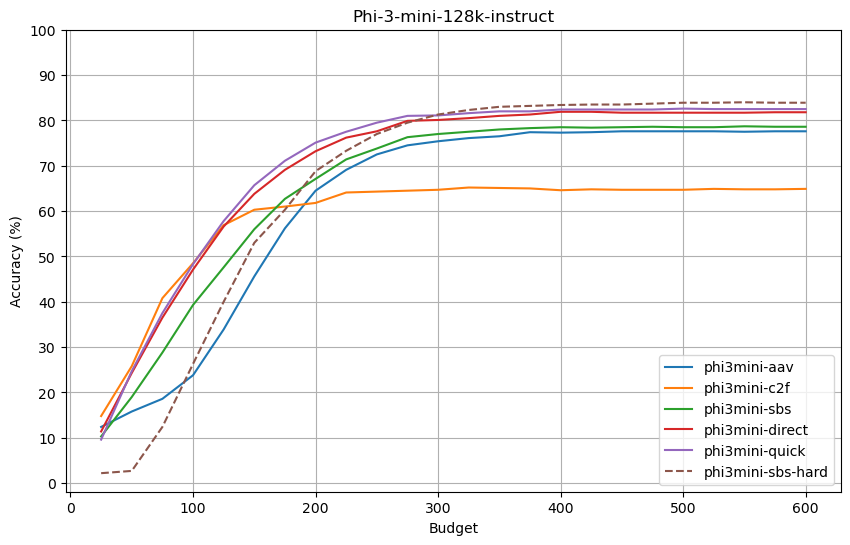

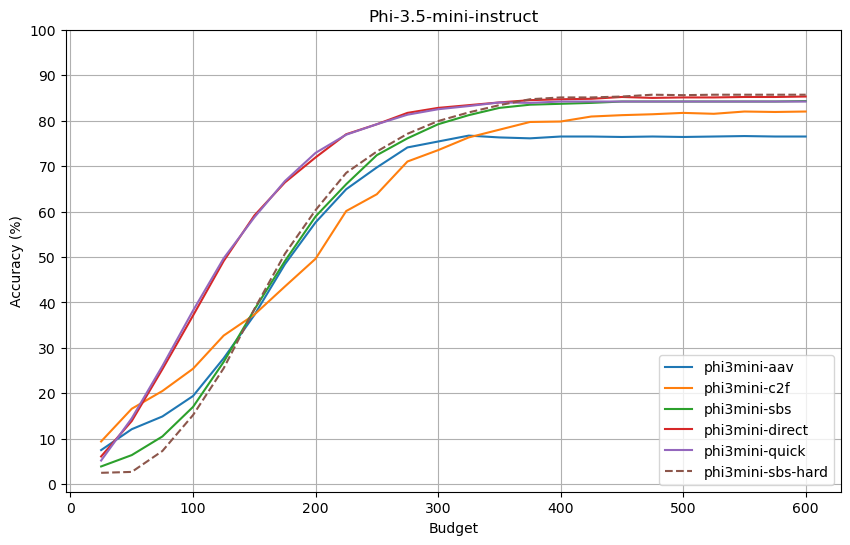

In [12]:
# plot separate image for each model
for model in model_list:
    plt.figure(figsize=(10, 6))
    for prompt_type in MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]:
        linestyle = "--" if "hard" in prompt_type else "-"
        plt.plot(gen_budget_list(1, dataset, model), model_acc_dicts[model][prompt_type], label=prompt_type, linestyle=linestyle, linewidth=1.5)
    plt.legend(loc="lower right")
    plt.title(model.split("/")[-1])
    plt.yticks(range(0, 101, 10))
    plt.grid(True)
    plt.xlabel("Budget")
    plt.ylabel("Accuracy (%)")
    plt.show()
